In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def load_res(seed=1234, optimizer='SGD', lr=1e-3, batchsize=16, depth=10, gsigma=3, size=16, augmentation=''):
    
    if augmentation == 'standard':
        augmentation = '_augmented'
    
    folder = 'logs/DSseed%d_%s_lr%s_batchsize%d_depth%d_gsigma%d%s/DSsize%d/' % (
        seed, 
        optimizer, 
        'p'.join(str(lr).split('.')), 
        batchsize, 
        depth, 
        gsigma, 
        augmentation, 
        size
    )
    
    try:
        train_loss = np.load(folder + 'train_loss.npy')
        val_loss = np.load(folder + 'validation_loss.npy')
        val_psnr = np.load(folder + 'validation_psnr.npy')
        val_gt_loss = np.load(folder + 'val_GT_loss.npy')
        val_gt_psnr = np.load(folder + 'val_GT_psnr.npy')
    except:
        return None
    
    return train_loss, val_loss, val_psnr, val_gt_loss, val_gt_psnr

In [3]:
def show_metrics(
    seed=1234, 
    optimizers=['SGD'], 
    lrs=[1e-3], 
    batchsizes=[16], 
    depths=[10], 
    gsigmas=[3], 
    sizes=[16], 
    augmentations=[''], 
    metrics=['val_psnr'], 
    show_title=True, 
    yAxisLabel=None, 
    outfile=None
):
    
    plt.figure(figsize=(16,5))
    
    fixed_parameters = ''
    varying_parameters = ''
    
    if len(optimizers)> 1:
        varying_parameters += ' %s'
    else:
        fixed_parameters += ' opt: %s ' % optimizers[0]
    if len(lrs) > 1:
        varying_parameters += ' lr=%s'
    else:
        fixed_parameters += ' lr: %s ' % 'p'.join(str(lrs[0]).split('.'))
    if len(batchsizes) > 1:
        varying_parameters += ' batch_size=%d'
    else:
        fixed_parameters += ' bs: %d ' % batchsizes[0]
    if len(depths) > 1:
        varying_parameters += ' depth=%d'
    else:
        fixed_parameters += ' depth: %d ' % depths[0]
    if len(gsigmas) > 1:
        varying_parameters += ' sigma=%d'
    else:
        fixed_parameters += ' sigma: %d ' % gsigmas[0]
    if len(sizes) > 1:
        varying_parameters += ' size=%d'
    else:
        fixed_parameters += ' size: %d ' % sizes[0]
    if len(augmentations) > 1:
        varying_parameters += ' %s'
    elif augmentations[0] != '':
        fixed_parameters += ' %s' % augmentations[0]
    
    if show_title:
        plt.title('(Fixed parameters)' + fixed_parameters, fontsize=18)
    
    for optimizer in optimizers:
        for lr in lrs:
            for batchsize in batchsizes:
                for depth in depths:
                    for gsigma in gsigmas:
                        for size in sizes:
                            for augmentation in augmentations:
                                loaded = load_res(
                                    seed, optimizer, lr, batchsize, depth, gsigma, size, augmentation
                                )

                                if loaded is None:
                                    continue
                                else:
                                    train_loss, val_loss, val_psnr, val_gt_loss, val_gt_psnr = loaded

                                var = []
                                if len(optimizers)> 1:
                                    var.append(optimizer)
                                if len(lrs) > 1:
                                    var.append('.'.join(str(lr).split('.')))
                                if len(batchsizes) > 1:
                                    var.append(batchsize)
                                if len(depths) > 1:
                                    var.append(depth)
                                if len(gsigmas) > 1:
                                    var.append(gsigma)
                                if len(sizes) > 1:
                                    var.append(size)
                                if len(augmentations) > 1:
                                    if augmentation == 'standard':
                                        augmentation = 'augmented'
                                    var.append(augmentation)

                                label_suffix = varying_parameters % tuple(var)

                                for metric in metrics:
                                    if metric == 'train_loss':
                                        plt.plot(np.trim_zeros(train_loss), label='Train loss' + label_suffix)
                                    elif metric == 'val_loss':
                                        plt.plot(np.trim_zeros(val_loss), label='Validation loss' + label_suffix)
                                    elif metric == 'val_psnr':
                                        plt.plot(np.trim_zeros(val_psnr), label='Validation PSNR' + label_suffix)
                                    elif metric == 'val_gt_loss':
                                        plt.plot(np.trim_zeros(val_gt_loss), label='Ground truth loss' + label_suffix)
                                    elif metric == 'val_gt_psnr':
                                        plt.plot(np.trim_zeros(val_gt_psnr), label='Ground truth PSNR' + label_suffix)

    plt.xlabel('Epoch', fontsize=16)
    if yAxisLabel is not None:
        plt.ylabel(yAxisLabel, fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    
    if outfile is not None:
        plt.savefig('saved_graphs/' + outfile, dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
def show_across_sizes(
    seed=1234, 
    optimizers=['SGD'], 
    lrs=[1e-3], 
    batchsizes=[16], 
    depths=[10], 
    gsigmas=[3], 
    sizes=[16, 1600, 3200, 4800, 6400], 
    augmentations=[''], 
    metrics=['val_psnr'], 
    baseline=None, 
    show_title=True, 
    yAxisLabel=None, 
    outfile=None
):
    
    plt.figure(figsize=(16,5))
    
    fixed_parameters = ''
    varying_parameters = ''
    
    if len(optimizers)> 1:
        varying_parameters += ' %s'
    else:
        fixed_parameters += ' opt: %s ' % optimizers[0]
    if len(lrs) > 1:
        varying_parameters += ' lr=%s'
    else:
        fixed_parameters += ' lr: %s ' % 'p'.join(str(lrs[0]).split('.'))
    if len(batchsizes) > 1:
        varying_parameters += ' batch_size=%d'
    else:
        fixed_parameters += ' bs: %d ' % batchsizes[0]
    if len(depths) > 1:
        varying_parameters += ' depth=%d'
    else:
        fixed_parameters += ' depth: %d ' % depths[0]
    if len(gsigmas) > 1:
        varying_parameters += ' sigma=%d'
    else:
        fixed_parameters += ' sigma: %d ' % gsigmas[0]
    if len(augmentations) > 1:
        varying_parameters += ' %s'
    elif augmentations[0] != '':
        fixed_parameters += ' %s' % augmentations[0]
    
    if show_title:
        plt.title('(Fixed parameters)' + fixed_parameters, fontsize=18)
    
    for optimizer in optimizers:
        for lr in lrs:
            for batchsize in batchsizes:
                for depth in depths:
                    for gsigma in gsigmas:
                        for augmentation in augmentations:
                            for metric in metrics:
                                metric_res = []

                                for size in sizes:
                                    loaded = load_res(
                                        seed, optimizer, lr, batchsize, depth, gsigma, size, augmentation
                                    )

                                    if loaded is None:
                                        continue
                                    else:
                                        train_loss, val_loss, val_psnr, val_gt_loss, val_gt_psnr = loaded

                                    if metric == 'train_loss':
                                        metric_res.append(np.min(np.trim_zeros(train_loss)))
                                    elif metric == 'val_loss':
                                        metric_res.append(np.min(np.trim_zeros(val_loss)))
                                    elif metric == 'val_psnr':
                                        metric_res.append(np.max(val_psnr))
                                    elif metric == 'val_gt_loss':
                                        metric_res.append(np.min(np.trim_zeros(val_gt_loss)))
                                    elif metric == 'val_gt_psnr':
                                        metric_res.append(np.max(val_gt_psnr))

                                if not metric_res:
                                    continue

                                var = []
                                if len(optimizers)> 1:
                                    var.append(optimizer)
                                if len(lrs) > 1:
                                    var.append('.'.join(str(lr).split('.')))
                                if len(batchsizes) > 1:
                                    var.append(batchsize)
                                if len(depths) > 1:
                                    var.append(depth)
                                if len(gsigmas) > 1:
                                    var.append(gsigma)
                                if len(augmentations) > 1:
                                    if augmentation == 'standard':
                                        augmentation = 'augmented'
                                    var.append(augmentation)

                                label_suffix = varying_parameters % tuple(var)

                                if metric == 'train_loss':
                                    plt.plot(sizes, metric_res, label='Train loss' + label_suffix, marker='o')
                                elif metric == 'val_loss':
                                    plt.plot(sizes, metric_res, label='Validation loss' + label_suffix, marker='o')
                                elif metric == 'val_psnr':
                                    plt.plot(sizes, metric_res, label='Validation PSNR' + label_suffix, marker='o')
                                elif metric == 'val_gt_loss':
                                    plt.plot(sizes, metric_res, label='Ground truth loss' + label_suffix, marker='o')
                                elif metric == 'val_gt_psnr':
                                    plt.plot(sizes, metric_res, label='Ground truth PSNR' + label_suffix, marker='o')

    if baseline is not None:
        plt.plot(sizes, [baseline for size in sizes], label='baseline')
    
    plt.xlabel('Training set size', fontsize=16)
    if yAxisLabel is not None:
        plt.ylabel(yAxisLabel, fontsize=16)
    plt.legend(fontsize=12)
    plt.grid()
    
    if outfile is not None:
        plt.savefig('saved_graphs/' + outfile, dpi=300, bbox_inches='tight')
    plt.show()

## Adam vs SGD

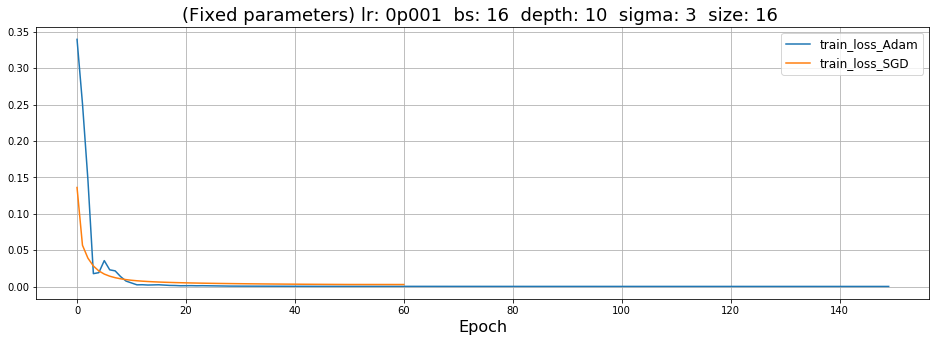

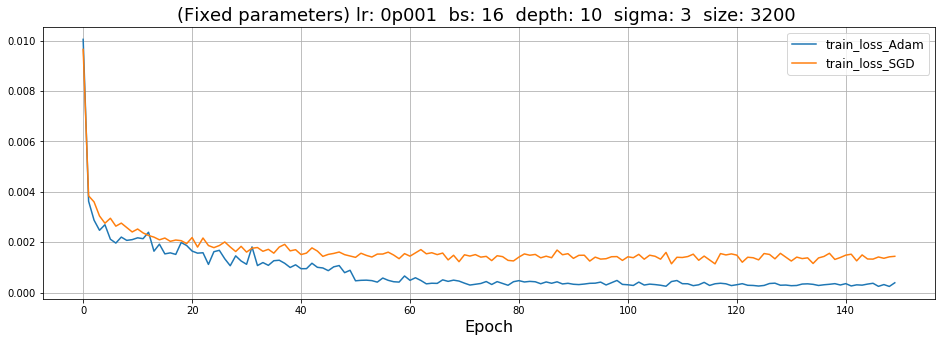

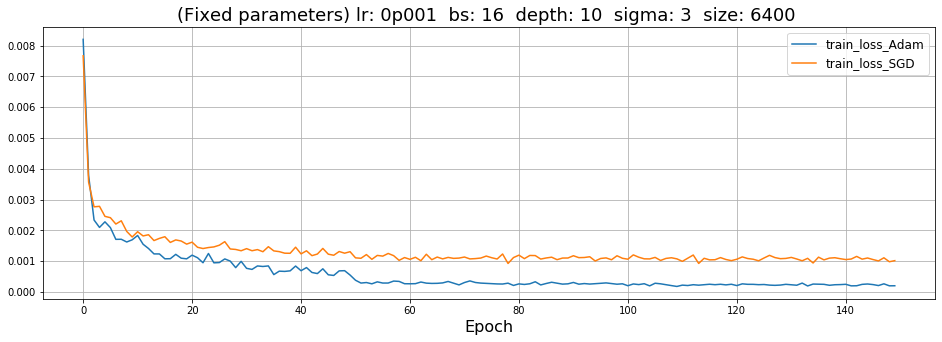

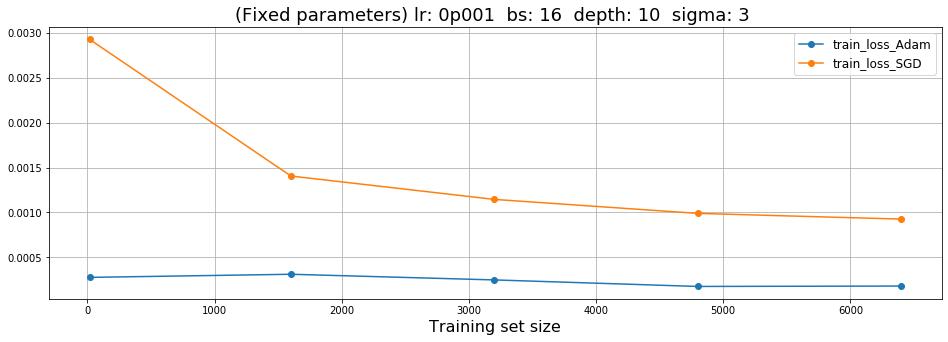

In [8]:
show_metrics(optimizers=['Adam', 'SGD'], sizes=[16], metrics=['train_loss'])
show_metrics(optimizers=['Adam', 'SGD'], sizes=[3200], metrics=['train_loss'])
show_metrics(optimizers=['Adam', 'SGD'], sizes=[6400], metrics=['train_loss'])

show_across_sizes(optimizers=['Adam', 'SGD'], lrs=[1e-3], metrics=['train_loss'])

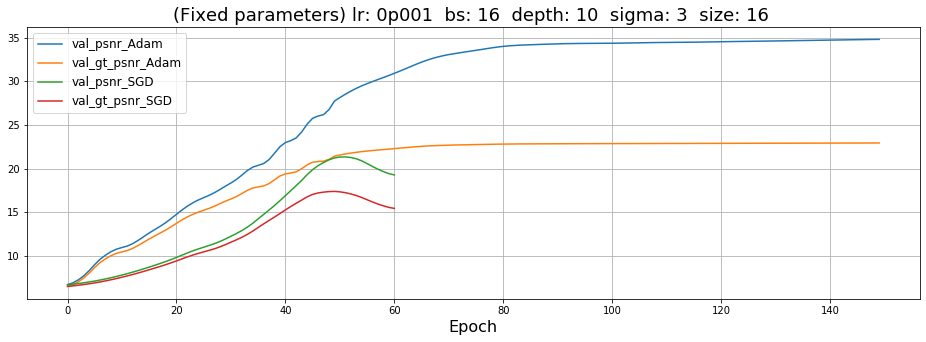

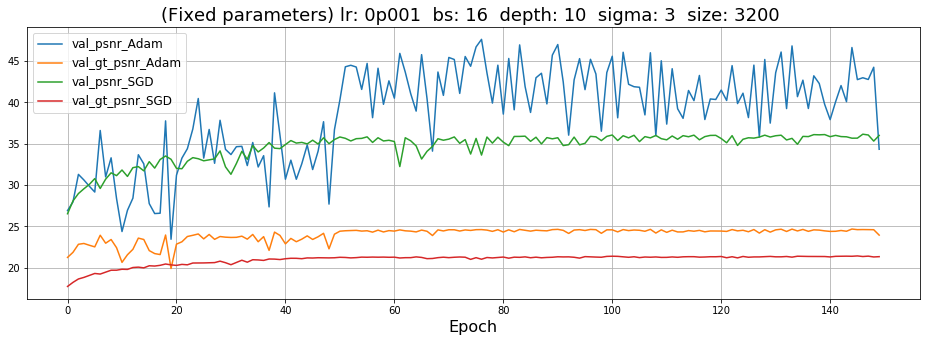

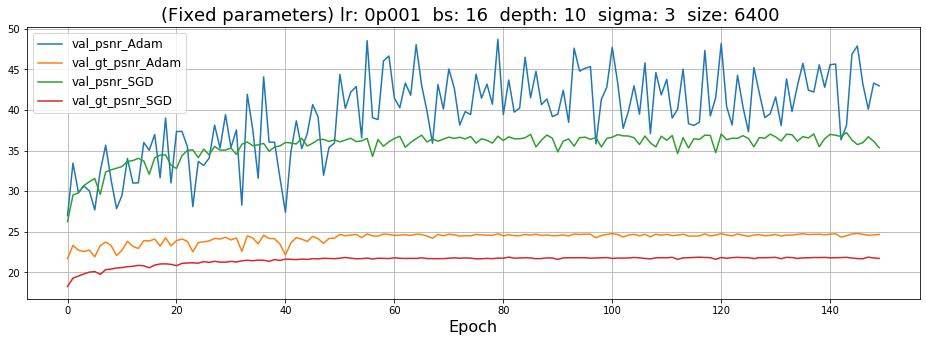

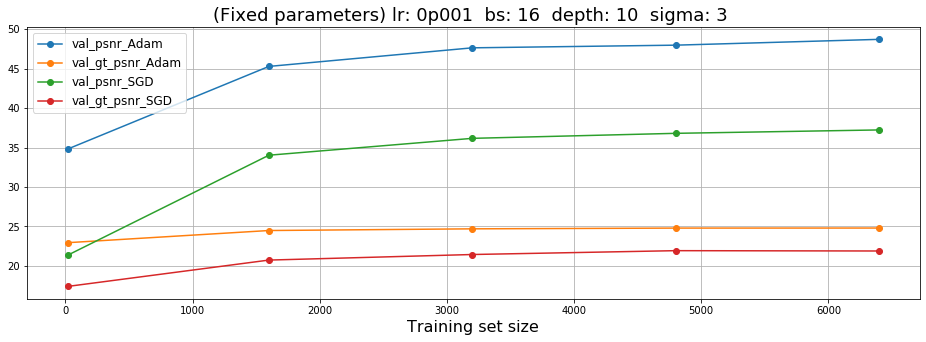

In [26]:
show_metrics(optimizers=['Adam', 'SGD'], sizes=[16], metrics=['val_psnr', 'val_gt_psnr'])
show_metrics(optimizers=['Adam', 'SGD'], sizes=[3200], metrics=['val_psnr', 'val_gt_psnr'])
show_metrics(optimizers=['Adam', 'SGD'], sizes=[6400], metrics=['val_psnr', 'val_gt_psnr'])

show_across_sizes(optimizers=['Adam', 'SGD'], lrs=[1e-3], metrics=['val_psnr', 'val_gt_psnr'])

## Learning rates

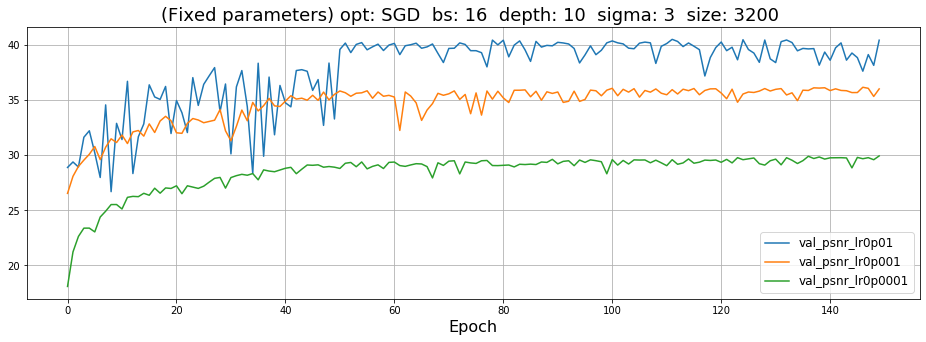

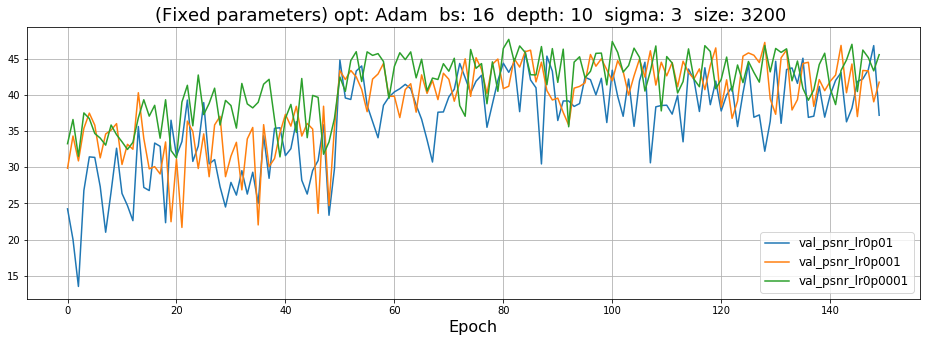

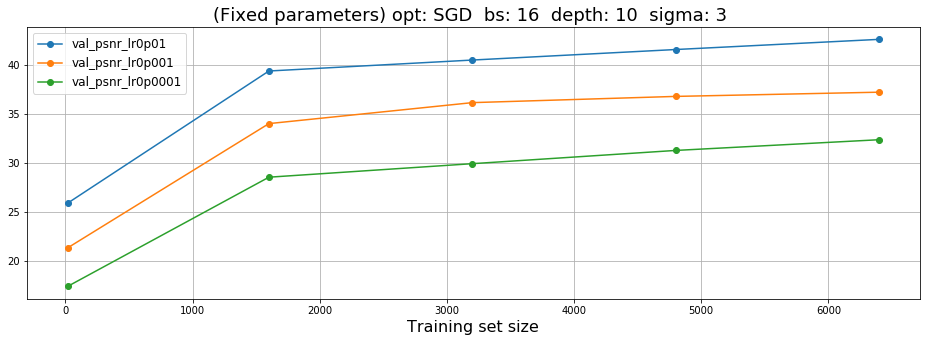

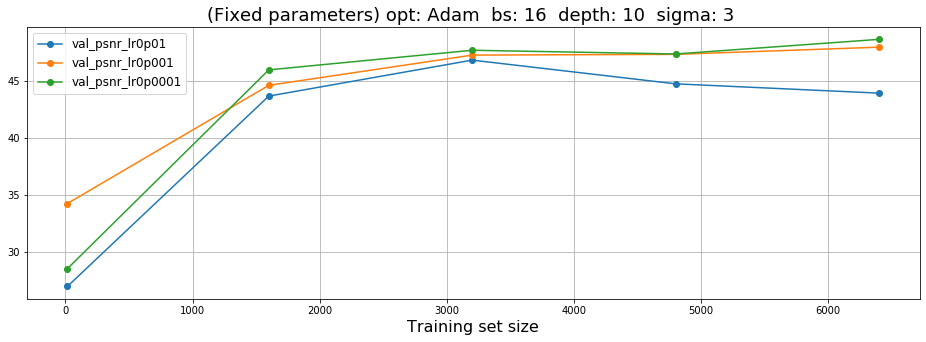

In [205]:
show_metrics(optimizers=['SGD'], lrs=[1e-2, 1e-3, 1e-4], sizes=[3200], metrics=['val_psnr'])
show_metrics(optimizers=['Adam'], lrs=[1e-2, 1e-3, 1e-4], sizes=[3200], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD'], lrs=[1e-2, 1e-3, 1e-4], metrics=['val_psnr'])
show_across_sizes(optimizers=['Adam'], lrs=[1e-2, 1e-3, 1e-4], metrics=['val_psnr'])

## Batch size

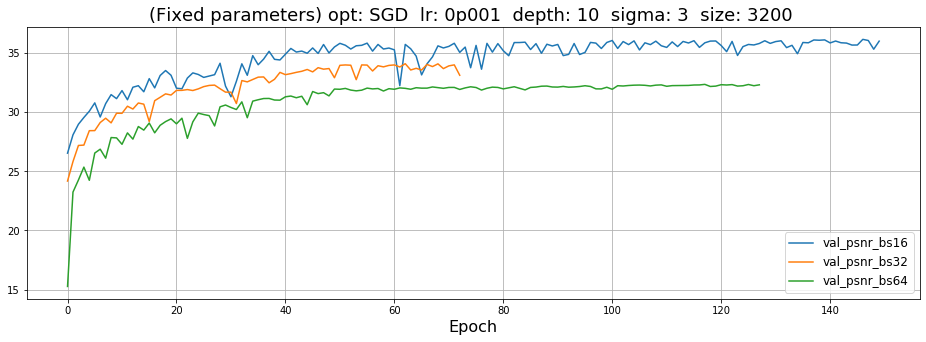

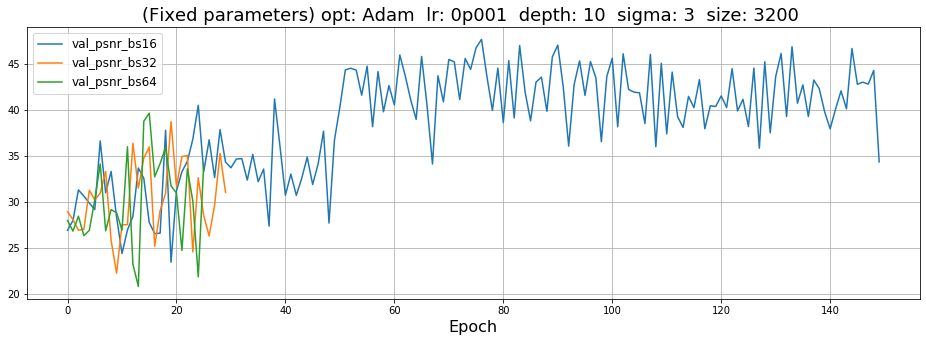

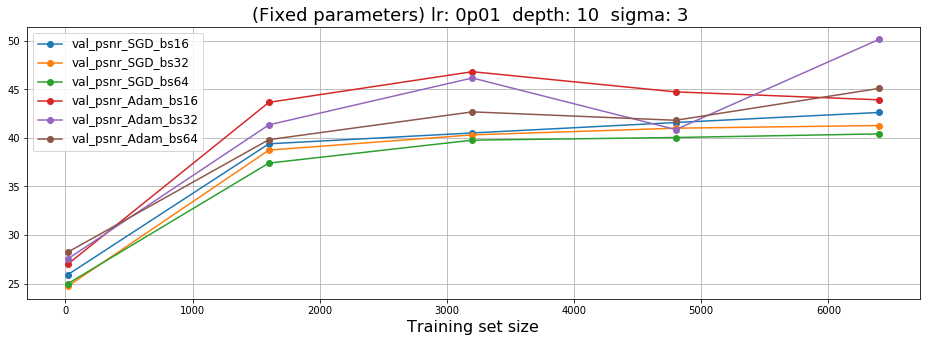

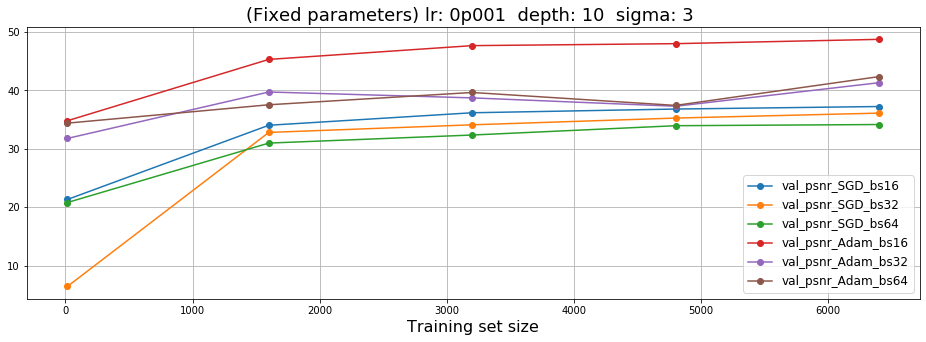

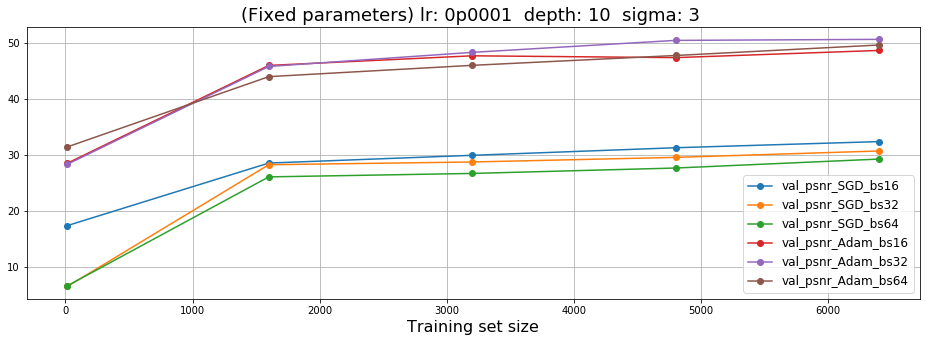

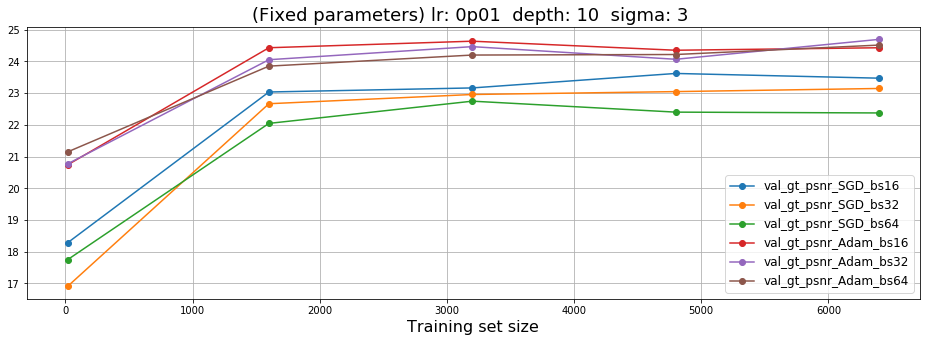

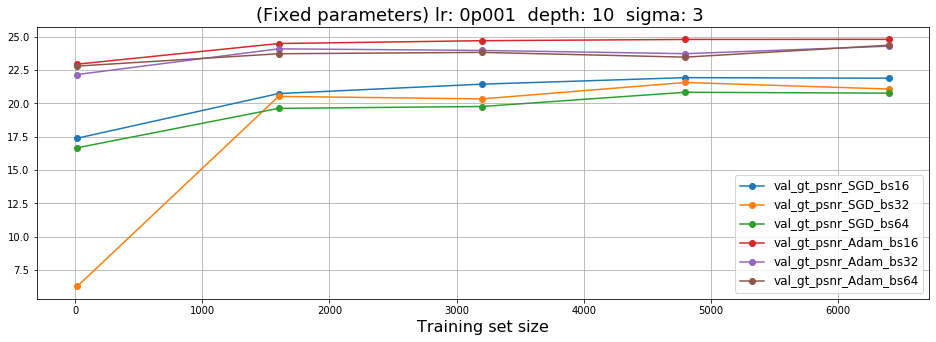

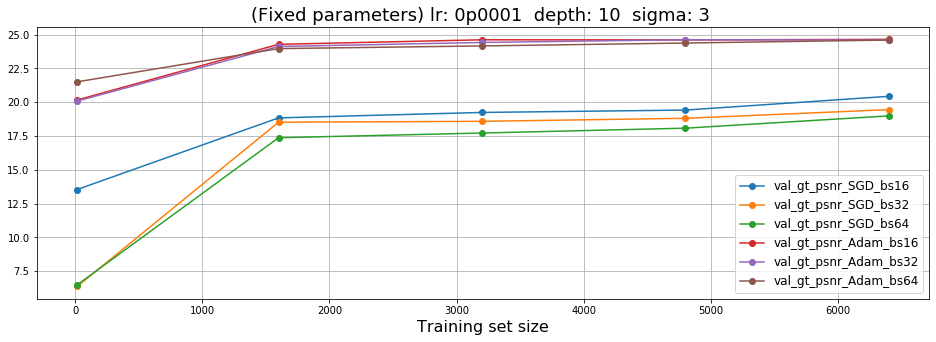

In [12]:
show_metrics(optimizers=['SGD'], batchsizes=[16, 32, 64], sizes=[3200], metrics=['val_psnr'])
show_metrics(optimizers=['Adam'], batchsizes=[16, 32, 64], sizes=[3200], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-2], batchsizes=[16, 32, 64], metrics=['val_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], batchsizes=[16, 32, 64], metrics=['val_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-4], batchsizes=[16, 32, 64], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-2], batchsizes=[16, 32, 64], metrics=['val_gt_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], batchsizes=[16, 32, 64], metrics=['val_gt_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-4], batchsizes=[16, 32, 64], metrics=['val_gt_psnr'])

## Depth

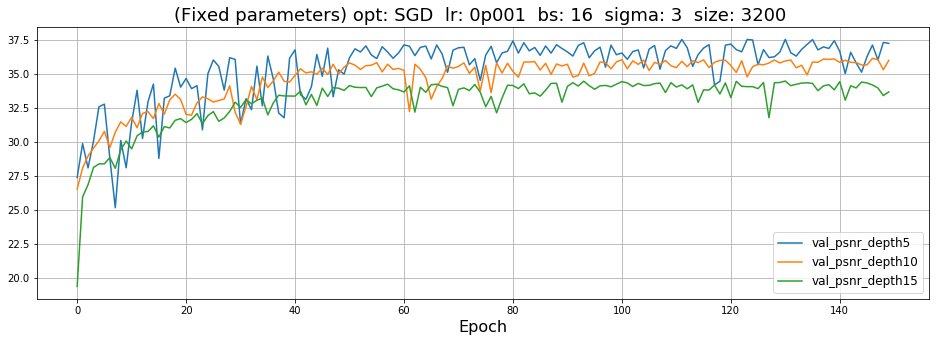

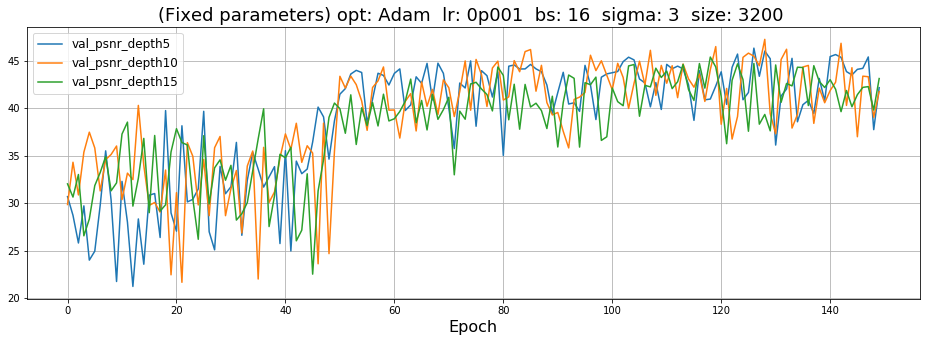

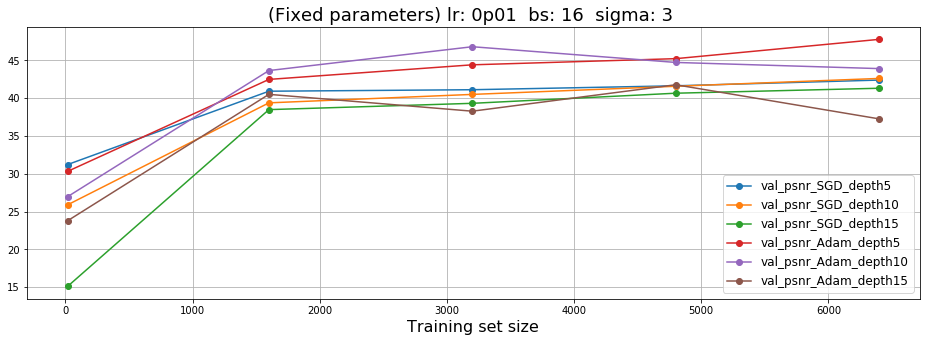

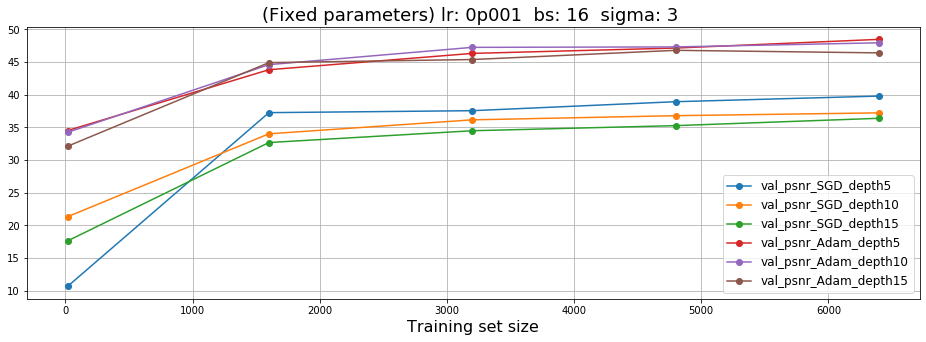

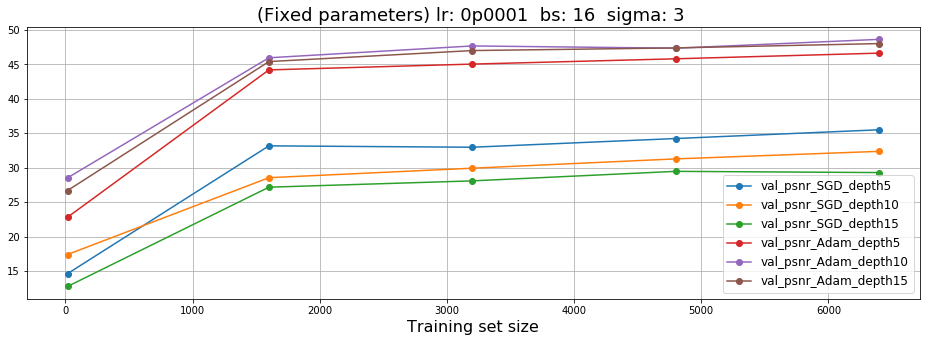

In [212]:
show_metrics(optimizers=['SGD'], depths=[5, 10, 15], sizes=[3200], metrics=['val_psnr'])
show_metrics(optimizers=['Adam'], depths=[5, 10, 15], sizes=[3200], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-2], depths=[5, 10, 15], metrics=['val_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], depths=[5, 10, 15], metrics=['val_psnr'])
show_across_sizes(optimizers=['SGD', 'Adam'], lrs=[1e-4], depths=[5, 10, 15], metrics=['val_psnr'])

## Blurring sigma

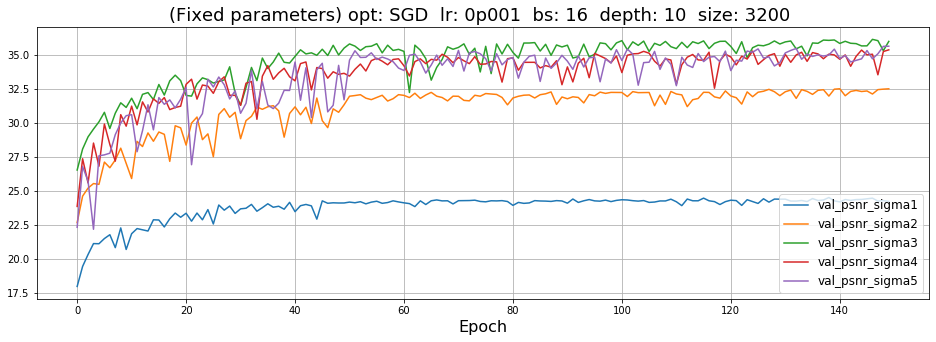

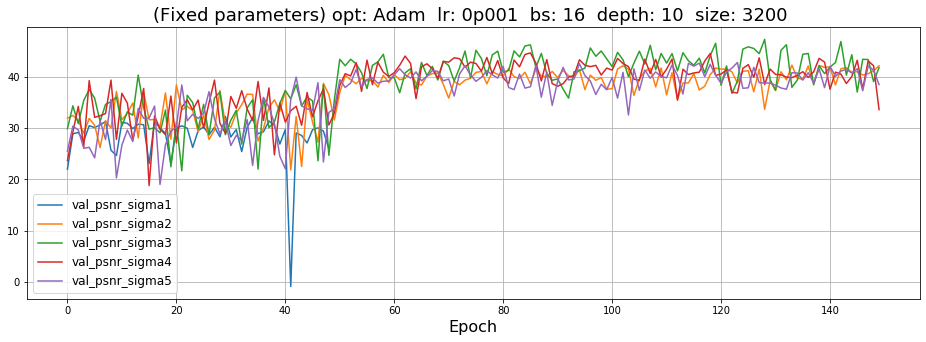

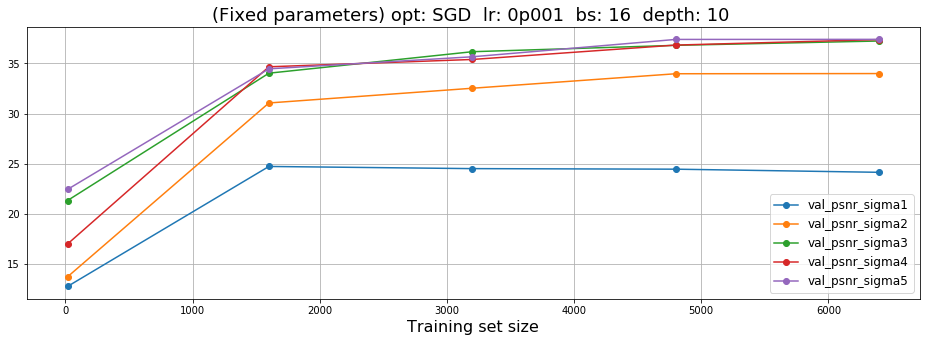

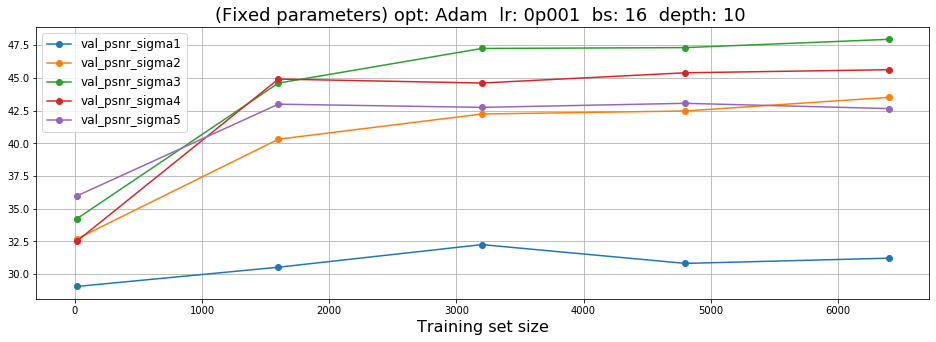

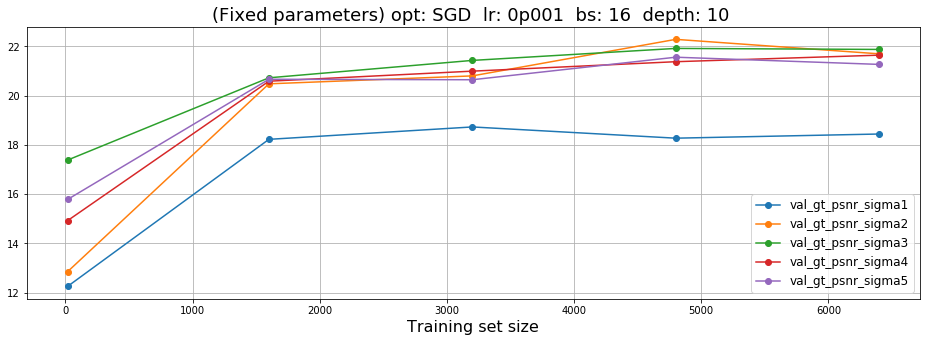

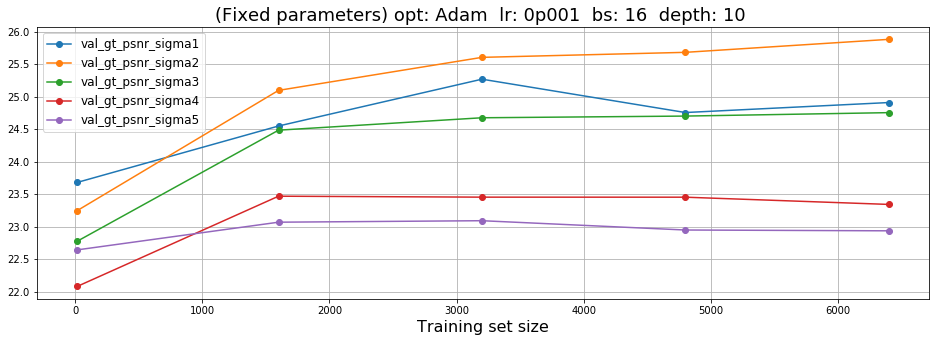

In [217]:
show_metrics(optimizers=['SGD'], gsigmas=[1, 2, 3, 4, 5], sizes=[3200], metrics=['val_psnr'])
show_metrics(optimizers=['Adam'], gsigmas=[1, 2, 3, 4, 5], sizes=[3200], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD'], gsigmas=[1, 2, 3, 4, 5], metrics=['val_psnr'])
show_across_sizes(optimizers=['Adam'], gsigmas=[1, 2, 3, 4, 5], metrics=['val_psnr'])

show_across_sizes(optimizers=['SGD'], gsigmas=[1, 2, 3, 4, 5], metrics=['val_gt_psnr'])
show_across_sizes(optimizers=['Adam'], gsigmas=[1, 2, 3, 4, 5], metrics=['val_gt_psnr'])

# Data Augmentation

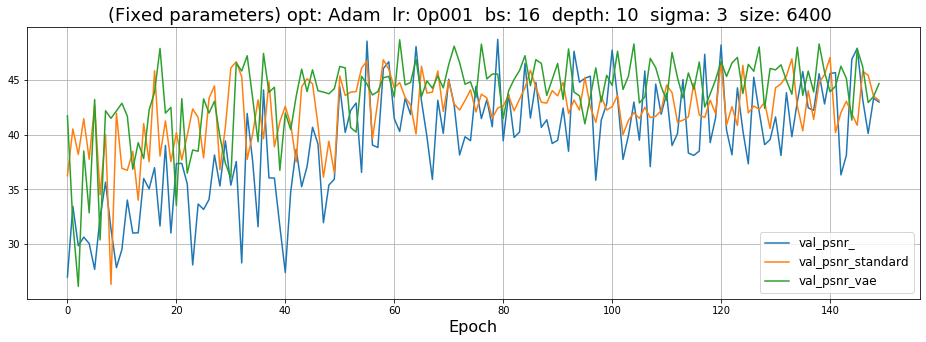

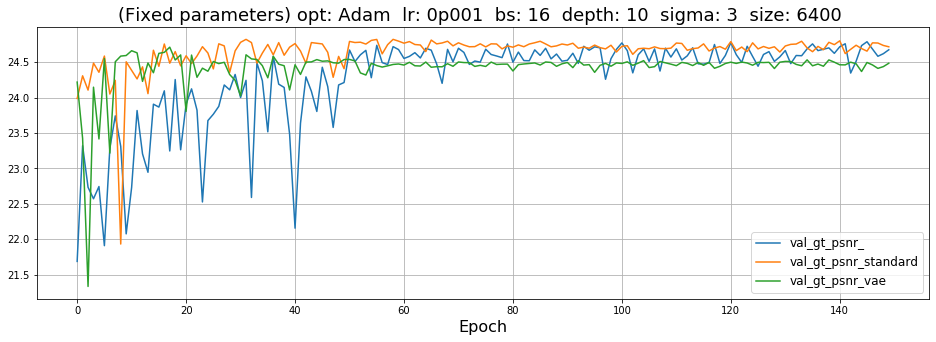

In [51]:
show_metrics(
    optimizers=['Adam'], 
    sizes=[6400], 
    metrics=['val_psnr'], 
    augmentations=['', 'standard', 'vae']
)
show_metrics(
    optimizers=['Adam'], 
    sizes=[6400], 
    metrics=['val_gt_psnr'], 
    augmentations=['', 'standard', 'vae']
)

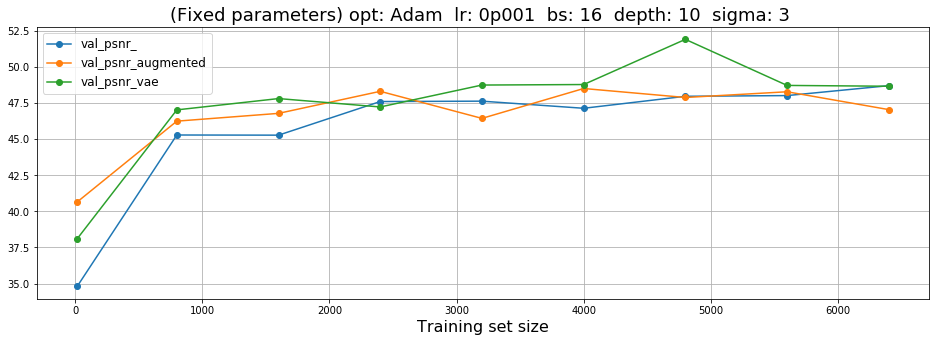

In [33]:
show_across_sizes(
    optimizers=['Adam'], 
    sizes=[16, 800, 1600, 2400, 3200, 4000, 4800, 5600, 6400], 
    metrics=['val_psnr'], 
    augmentations=['', 'standard', 'vae']
)

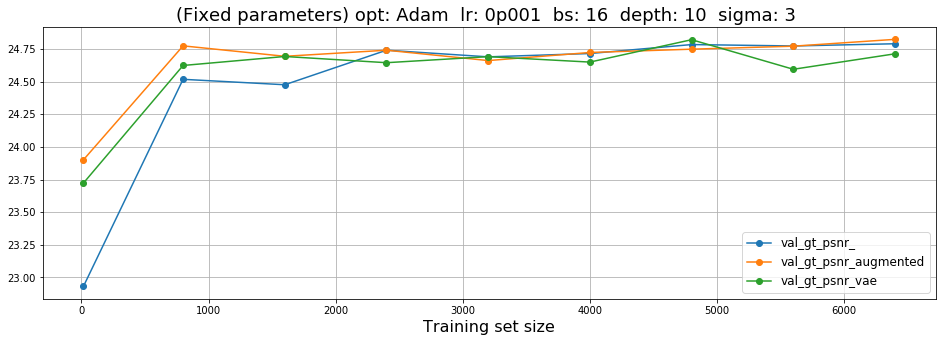

In [31]:
show_across_sizes(
    optimizers=['Adam'], 
    sizes=[16, 800, 1600, 2400, 3200, 4000, 4800, 5600, 6400], 
    metrics=['val_gt_psnr'], 
    augmentations=['', 'standard', 'vae']
)

# Report Graphs

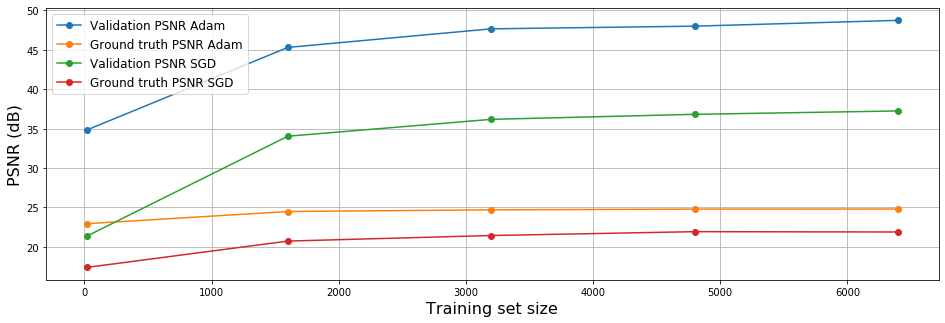

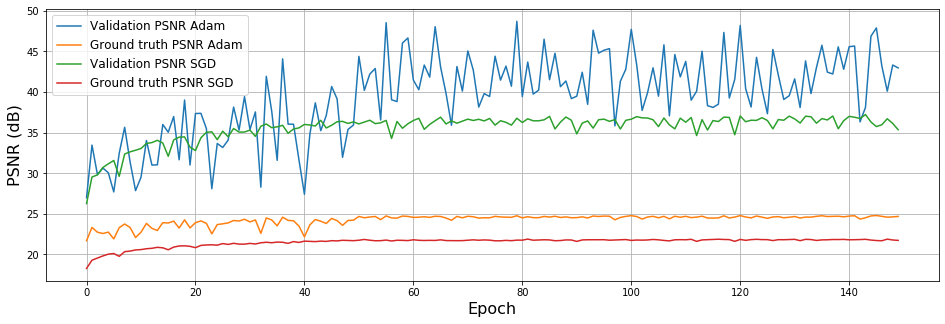

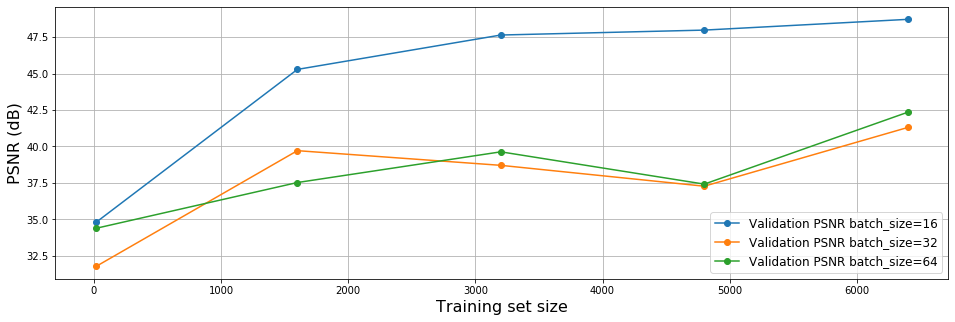

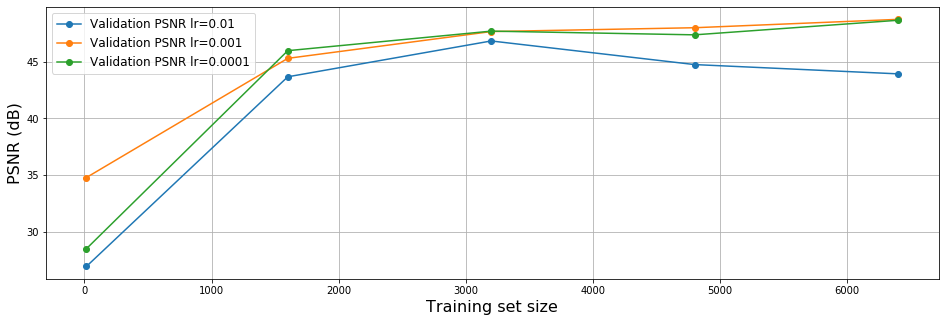

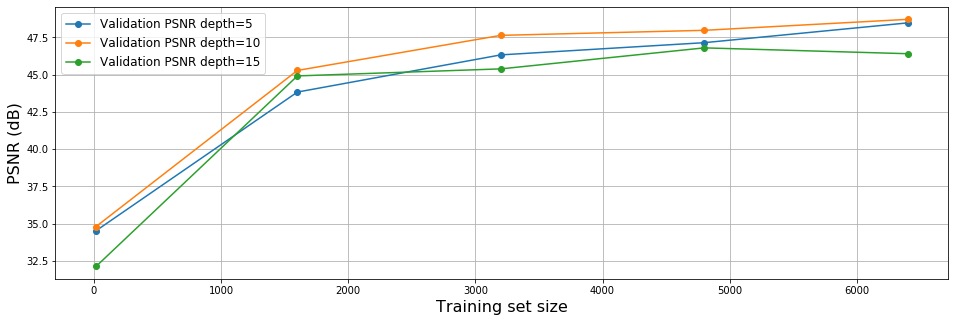

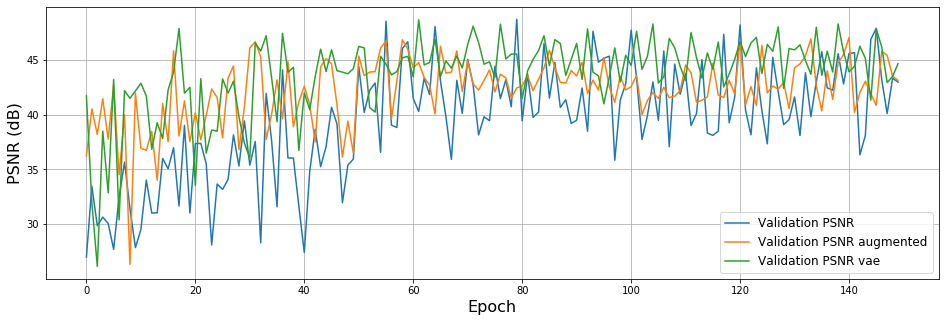

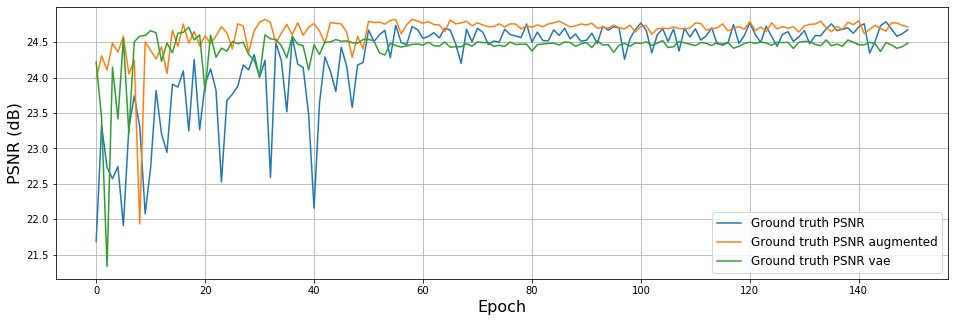

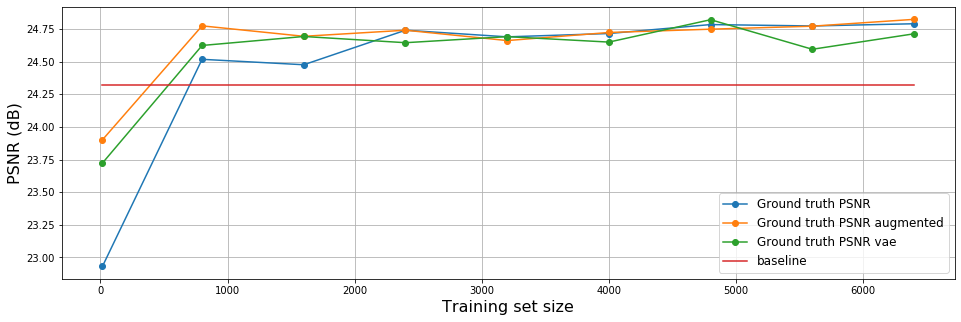

In [13]:
show_across_sizes(optimizers=['Adam', 'SGD'], lrs=[1e-3], metrics=['val_psnr', 'val_gt_psnr'], show_title=False, 
                  yAxisLabel='PSNR (dB)', outfile='graph1')

show_metrics(optimizers=['Adam', 'SGD'], sizes=[6400], metrics=['val_psnr', 'val_gt_psnr'], show_title=False, 
             yAxisLabel='PSNR (dB)', outfile='graph2')

show_across_sizes(optimizers=['Adam'], batchsizes=[16, 32, 64], metrics=['val_psnr'], show_title=False, 
                  yAxisLabel='PSNR (dB)', outfile='graph3')

show_across_sizes(optimizers=['Adam'], lrs=[1e-2, 1e-3, 1e-4], metrics=['val_psnr'], show_title=False, 
                  yAxisLabel='PSNR (dB)', outfile='graph4')

show_across_sizes(optimizers=['Adam'], depths=[5, 10, 15], metrics=['val_psnr'], show_title=False, 
                  yAxisLabel='PSNR (dB)', outfile='graph5')

show_metrics(
    optimizers=['Adam'], 
    sizes=[6400], 
    metrics=['val_psnr'], 
    augmentations=['', 'standard', 'vae'], 
    show_title=False, 
    yAxisLabel='PSNR (dB)', 
    outfile='graph6'
)

show_metrics(
    optimizers=['Adam'], 
    sizes=[6400], 
    metrics=['val_gt_psnr'], 
    augmentations=['', 'standard', 'vae'], 
    show_title=False, 
    yAxisLabel='PSNR (dB)', 
    outfile='graph7'
)

show_across_sizes(
    optimizers=['Adam'], 
    sizes=[16, 800, 1600, 2400, 3200, 4000, 4800, 5600, 6400], 
    metrics=['val_gt_psnr'], 
    augmentations=['', 'standard', 'vae'], 
    baseline=24.318, 
    show_title=False, 
    yAxisLabel='PSNR (dB)', 
    outfile='graph8'
)